In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patch 
import cv2
import numpy as np
import matplotlib.image as mpimg
import math
import sys
import os
from scipy.ndimage.filters import convolve
from scipy.ndimage.filters import gaussian_filter
from scipy import signal as sig
import io
import random
import math
import secrets
import scipy.spatial.distance
from scipy.spatial import distance

(450, 450, 3)


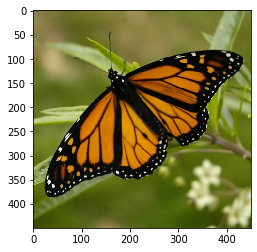

In [2]:
image = cv2.imread('butterfly.jpg')
img = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image = np.array(img)
original_shape = image.shape
print(original_shape)
plt.imshow(image)

In [3]:
row = image.shape[0]
col = image.shape[1]
print(row,col)

450 450


In [4]:
print(image)

[[[120 115  60]
  [123 118  63]
  [126 121  66]
  ...
  [125 126  84]
  [125 127  87]
  [124 126  87]]

 [[127 122  67]
  [128 123  68]
  [129 124  69]
  ...
  [124 125  81]
  [123 125  85]
  [122 124  84]]

 [[131 126  71]
  [130 125  70]
  [129 124  69]
  ...
  [123 124  80]
  [123 124  80]
  [124 125  83]]

 ...

 [[ 56  76   4]
  [ 56  76   4]
  [ 58  75   5]
  ...
  [ 58  75   5]
  [ 58  74   3]
  [ 58  74   3]]

 [[ 56  73   3]
  [ 58  75   5]
  [ 58  75   5]
  ...
  [ 59  75   4]
  [ 57  74   4]
  [ 57  74   4]]

 [[ 57  74   4]
  [ 59  76   6]
  [ 59  76   6]
  ...
  [ 58  74   3]
  [ 57  74   4]
  [ 57  74   4]]]


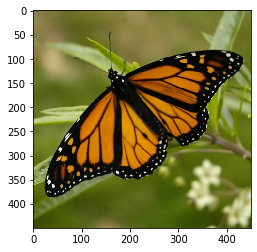

In [5]:
plt.imshow(image)

True

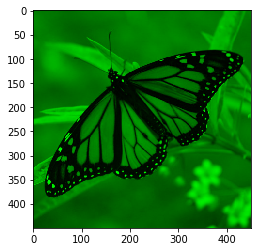

In [6]:
green_channel = image[:,:,1]
green_img = np.zeros(image.shape)
green_img[:,:,1] = green_channel
plt.imshow(green_img.astype('uint8'))
cv2.imwrite('cv2-green-channel.png',green_img)

True

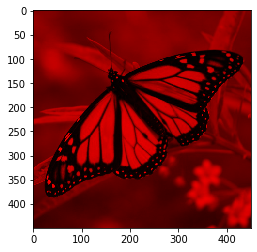

In [7]:
red_channel = image[:,:,0]
red_img = np.zeros(image.shape)
red_img[:,:,0] = red_channel
plt.imshow(red_img.astype('uint8'))
cv2.imwrite('cv2-red-channel.png',red_img)

True

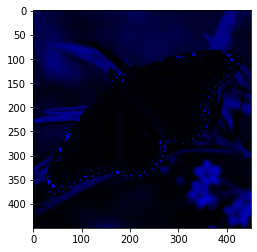

In [8]:
blue_channel = image[:,:,2]
blue_img = np.zeros(image.shape)
blue_img[:,:,2] = blue_channel
plt.imshow(blue_img.astype('uint8'))
cv2.imwrite('cv2-blue-channel.png',blue_img)

In [9]:
k=0
data = np.zeros((row*col,5))
#print(data)
for i in range (1,row):
    for j in range(1,col):
        k=k+1
        #print(k)
        #print(data[k,3:6])
        data[k,0:3]=image[i,j,:]
        #print(data[k,0:3])
        data[k,3:5]=[i,j]

In [10]:
print(data)

[[  0.   0.   0.   0.   0.]
 [128. 123.  68.   1.   1.]
 [129. 124.  69.   1.   2.]
 ...
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]]


In [11]:
#Normalization of data 
data = data.copy()
data = data/[255,255,255,row,col]

In [12]:
print(data)

[[0.         0.         0.         0.         0.        ]
 [0.50196078 0.48235294 0.26666667 0.00222222 0.00222222]
 [0.50588235 0.48627451 0.27058824 0.00222222 0.00444444]
 ...
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]


In [13]:
data=[]
for i in range(row):
    for j in range(col):
        r,g,b=image[i,j]
        data.append([r,g,b,i,j])
data=np.asarray(data).astype('float64')

In [14]:
print(data)

[[120. 115.  60.   0.   0.]
 [123. 118.  63.   0.   1.]
 [126. 121.  66.   0.   2.]
 ...
 [ 58.  74.   3. 449. 447.]
 [ 57.  74.   4. 449. 448.]
 [ 57.  74.   4. 449. 449.]]


In [15]:
for i in range(3):
    data[:,i] = data[:,i]/255
data[:,3] = data[:,3]/row
data[:,4] = data[:,4]/col

In [16]:
def mean_colour(similar_elements):
    red_channel = similar_elements[:,0].mean()
    green_channel =similar_elements[:,1].mean()
    blue_channel =similar_elements[:,2].mean()
    red =int(float(red_channel)*255)
    green=int(float(green_channel)*255)
    blue=int(float(blue_channel)*255)
    return [red,green,blue]

In [17]:
to_be_labelled = np.arange(1,row*col)

In [18]:
def euc_dist(a,b):
    dist= np.linalg.norm(a-b)
    dist=abs(dist)
    return dist

In [19]:
labelled = []
final_labels = np.zeros((row*col,1))
history_labels = np.zeros((row*col,1))
colors={}
bW = 0.2

In [20]:
print(final_labels.shape)

(202500, 1)


In [21]:
import sklearn
from sklearn.metrics import pairwise_distances

In [22]:
tt=0
while(1):
    can_be_labelled = list(set(to_be_labelled).difference(set(labelled)))
    print(len(can_be_labelled))
    if len(can_be_labelled)==0:
        break
    if len(can_be_labelled) == tt:
        k=k+1
        #print(k)
        can_be_labelled_data=[]
        for i in can_be_labelled:
            can_be_labelled_data.append(data[i])
            final_labels[i] = k
        labelled.extend(list(can_be_labelled))
        #print("labelled",labelled)
        #print(similar_elements)
        can_be_labelled_data = np.asarray(can_be_labelled_data)
        colors[k] = mean_colour(can_be_labelled_data)
        break
        #final_labels[final_labels==0] = history_labels[final_labels==0]
        #average_mean = data[np.where(final_labels==0)[0]]
        #print(mean_colour[k,:])
        #mean_colour[k,:] = average_mean.mean(axis=0)
        #final_labels[final_labels==0] = k
        #print(final_labels)
    tt = len(list(can_be_labelled))
    random_index = secrets.choice(can_be_labelled)
    pixel = data[random_index]
    
    
    #print(random_index)
    #print(can_be_labelled[random_index])
    #pixel = data[can_be_labelled[random_index],:]
    #print(pixel)
    while(1):
        pixel_old = pixel
        #pixel = pixel.reshape(1,-1)
        similar_indices=[]
        similar_elements=[]
        #print(pixel)
        for i in can_be_labelled:
            #print(data[i])
            dist = euc_dist(pixel,data[i])
            if dist < bW:
                similar_indices.append(i)
                similar_elements.append(data[i])
        #similar_elements = np.asarray(similar_elements)
        #print(pixel[0])

        #distance = sklearn.metrics.pairwise_distances(pixel,data[can_be_labelled,:], metric='euclidean')
        #print(can_be_labelled[0])
        #similar_indices = np.where(data<bW)[0]
        #similar_elements = data[data < bW]
        #print(similar_elements[65535])
        #print(similar_indices[0])
        if len(similar_indices)<100:
            break
        
        #print(can_be_labelled[similar_indices])
        pixel = np.mean(similar_elements, axis = 0)
        d = euc_dist(pixel, pixel_old)
        if (d) <0.0001:
            k = k+1
            for j in similar_indices:
                final_labels[j]=k
            labelled = list(labelled)
            labelled.extend(list(similar_indices))
            similar_elements=np.asarray(similar_elements)
            colors[k] = mean_colour(similar_elements)
            break
        for l in similar_indices:
            similar_2 = similar_indices
            history_labels[l] = k+1 
    tt = len(can_be_labelled)
    can_be_labelled = list(set(to_be_labelled).difference(set(labelled)))

202499
191826
180664
165148
161016
153681
149119
141392
134501
126181
114982
113154
106064
104488
88103
80458
77331
74165
70145
68039
58512
54650
51759
48934
46414
38483
37222
31926
31071
30220
27231
27231


In [24]:
final_labels=np.array(final_labels)
print(len(final_labels))
noise = np.nonzero(final_labels == 0)
noisy_data=[]
for m in noise:
    noisy_data.append(data[m][0])
if len(noisy_data)==0:
    colors[0]=[0,0,0] 
else:
    noisy_data = np.asarray(noisy_data)
    colors[0] = mean_colour(noisy_data)

202500


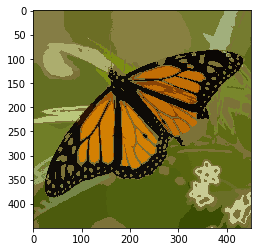

In [25]:
labels=final_labels.reshape(row,col)
r,c = labels.shape
image_new=np.zeros((row,col,3))
for i in range(r):
    for j in range(c):
        image_new[i,j]=colors[labels[i,j]]

plt.imshow(image_new.astype('uint8'),cmap='gray')
plt.show()